# 3. Cluster analysis

## Code

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

from sklearn.cluster import AgglomerativeClustering

In [6]:
import prepostprocessing.pre_processing as preproc

In [7]:
area1_int_df = preproc.load_obj("area1_int_df")



pca_df = preproc.load_obj("mineralogy_pca_df1")
metadata = preproc.load_obj("metadata")


In [8]:
area_numbers = pd.read_excel("../_INTERPOLATION/area_subdivided.xlsx", index_col=0, usecols=[0, 24, 29])
#area_numbers = pd.read_excel("../_INTERPOLATION/area1.xlsx", index_col=None, usecols=[0, 24, 29])

In [9]:
area1_int_df = area1_int_df.iloc[:, 0: 2]

In [10]:
area1_int_df

,PC01,PC02
2809,-0.871616,-0.061954
2810,-0.867083,-0.061057
2811,-0.863637,-0.060284
2812,-0.881656,-0.001032
2813,-0.881230,-0.000526
...,...,...
205097,-0.049269,-0.211667
205541,-0.047306,-0.221904
205542,-0.047587,-0.220724
205543,-0.047827,-0.219399


### Remark
**The metadata dataframe you use here for the entire dataset is actually the one for area 1.**  
**Note that metadata for samples that fall outside one of the 5 areas are already excluded from 'area_numbers', though.**

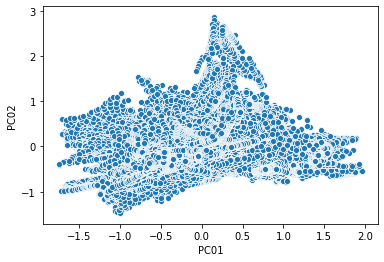

In [11]:
sns.scatterplot(x="PC01", y="PC02", data=area1_int_df)
plt.show();

In [56]:
def create_dendrogram(data, linkage_method='ward', save=""):
    """Plot dendrogram
    
    Parameters:
    -----------
    data : array or DataFrame
        Data to be clustered
    linkage_method : str (optional)
        Method to use to construct the linkage matrix
        Choose between ['single', 'complete', 'average',
        'weighted', 'centroid', 'median', 'ward']
        For detailed information see 
        https://docs.scipy.org/doc/scipy-0.14.0/reference/ \
        generated/scipy.cluster.hierarchy.linkage.html
    save : str (optional)
        Name to use for figure file when saving
    """
    
    linkage_matrix = linkage(data, linkage_method)
    c, coph_dists = cophenet(linkage_matrix, pdist(data))
    print("Cophenetic correlation coefficient:", c)
    
    plt.figure(figsize=(25, 10))
    dendrogram(linkage_matrix, labels=data.index)
    if save != "":
        plt.savefig(f"../_FIGURES/{save}.pdf")
    plt.show()

Cophenetic correlation coefficient: 0.39146922638348935


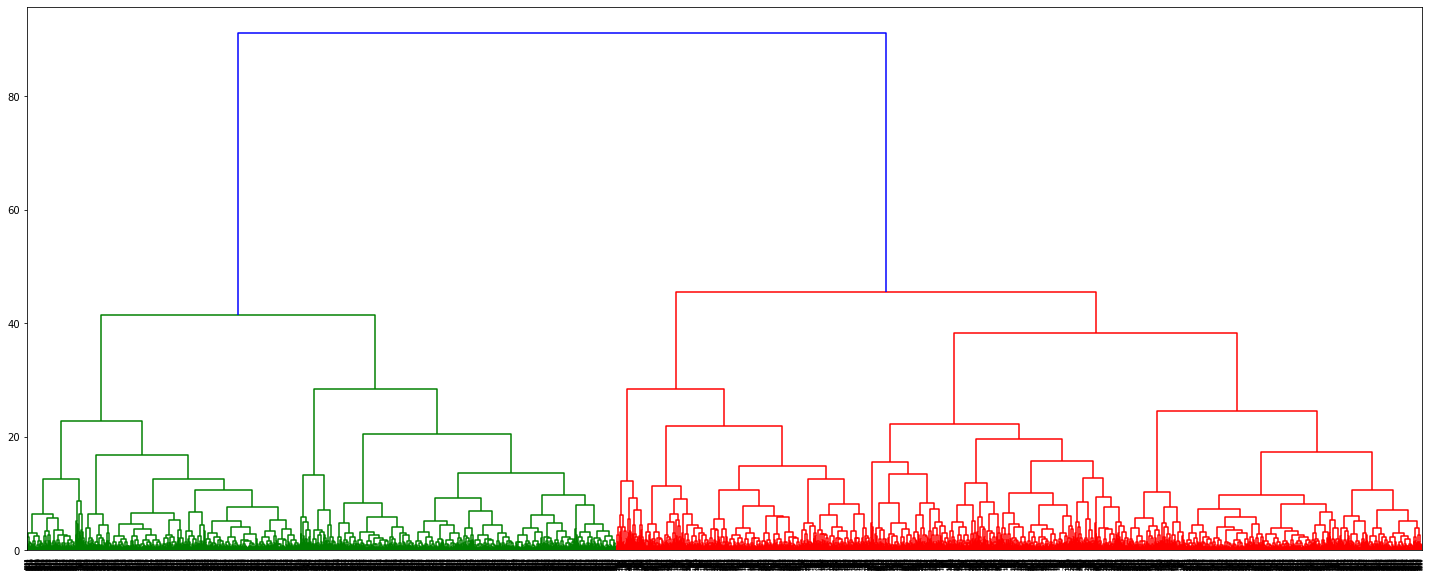

Wall time: 1min 46s


In [57]:
%%time
create_dendrogram(area1_int_df, linkage_method='ward')

In [ ]:
%%time
X = area1_int_df.values

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

In [ ]:
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow', s=10)
plt.show();

In [60]:
# You can call the 'labels_' attribute of 'cluster' here instead of 
# performing the 'fit_transform' operation again.
cluster_groups= pd.DataFrame(data=cluster.labels_)

In [61]:
cluster_groups

,0
0,0
1,2
2,0
3,0
4,0
...,...
4654,3
4655,3
4656,3
4657,3


In [70]:
area_numbers = pd.read_excel("../_INTERPOLATION/area_subdivided.xlsx", index_col=0, usecols=[0, 24, 29])
#area_numbers = pd.read_excel("../_INTERPOLATION/area1.xlsx", index_col=None, usecols=[0, 24, 29])

In [71]:
clustering = pd.concat([area_numbers, cluster_groups], axis = 1)
clustering = clustering.dropna()

In [72]:
clustering

,time,area,0
1,K,2.0,2.0
2,Tr,1.0,0.0
3,K,3.0,0.0
4,K,3.0,0.0
5,K,4.0,2.0
...,...,...,...
4653,K,3.0,3.0
4654,K,2.0,3.0
4655,K,4.0,3.0
4656,K,2.0,3.0


In [73]:
clustering.to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/cluster_control_points.xlsx", index=True)

In [74]:
clustering

,time,area,0
1,K,2.0,2.0
2,Tr,1.0,0.0
3,K,3.0,0.0
4,K,3.0,0.0
5,K,4.0,2.0
...,...,...,...
4653,K,3.0,3.0
4654,K,2.0,3.0
4655,K,4.0,3.0
4656,K,2.0,3.0


In [75]:
clustering.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/interpolation/Area1/control_points_count.xlsx")

-----

In [76]:
clustering1= clustering.loc[clustering['area'] == 1]
clustering2= clustering.loc[clustering['area'] == 2]
clustering3= clustering.loc[clustering['area'] == 3]
clustering4= clustering.loc[clustering['area'] == 4]
clustering5= clustering.loc[clustering['area'] == 5]

In [77]:
clustering1_J = clustering1.loc[clustering1['time'] == 'J']
clustering1_Tr = clustering1.loc[clustering1['time'] == 'Tr']
clustering1_Tr_J = clustering1.loc[clustering1['time'] == 'Tr-J']
clustering1_Mz = clustering1.loc[clustering1['time'] == 'Mz']
clustering1_K = clustering1.loc[clustering1['time'] == 'K']

clustering1_J.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/clr/groups_counts_area1_J.xlsx")
clustering1_Tr.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/clr/groups_counts_area1_Tr.xlsx")
clustering1_Tr_J.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/clr/groups_counts_area1_Tr_J.xlsx")
clustering1_Mz.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/clr/groups_counts_area1_Mz.xlsx")
clustering1_K.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/clr/groups_counts_area1_K.xlsx")

In [78]:
clustering2_J = clustering2.loc[clustering2['time'] == 'J']
clustering2_Tr = clustering2.loc[clustering2['time'] == 'Tr']
clustering2_Pg = clustering2.loc[clustering2['time'] == 'Pg']
clustering2_K = clustering2.loc[clustering2['time'] == 'K']

clustering2_J.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/clr/groups_counts_area2_J.xlsx")
clustering2_Tr.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/clr/groups_counts_area2_Tr.xlsx")
clustering2_Pg.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/clr/groups_counts_area2_Pg.xlsx")
clustering2_K.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/clr/groups_counts_area2_K.xlsx")

In [79]:
clustering3_J = clustering3.loc[clustering3['time'] == 'J']
clustering3_Tr = clustering3.loc[clustering3['time'] == 'Tr']
clustering3_Pg = clustering3.loc[clustering3['time'] == 'Pg']
clustering3_K = clustering3.loc[clustering3['time'] == 'K']

clustering3_J.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/clr/groups_counts_area3_J.xlsx")
clustering3_Tr.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/clr/groups_counts_area3_Tr.xlsx")
clustering3_Pg.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/clr/groups_counts_area3_Pg.xlsx")
clustering3_K.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/clr/groups_counts_area3_K.xlsx")

In [80]:
clustering4_J = clustering4.loc[clustering4['time'] == 'J']
clustering4_Mz = clustering4.loc[clustering4['time'] == 'Mz']
clustering4_Pg = clustering4.loc[clustering4['time'] == 'Pg']
clustering4_K = clustering4.loc[clustering4['time'] == 'K']

clustering4_J.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/clr/groups_counts_area4_J.xlsx")
clustering4_Mz.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/clr/groups_counts_area4_Mz.xlsx")
clustering4_Pg.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/clr/groups_counts_area4_Pg.xlsx")
clustering4_K.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/clr/groups_counts_area4_K.xlsx")

In [81]:
clustering5_Mz = clustering5.loc[clustering5['time'] == 'Mz']
clustering5_Pg = clustering5.loc[clustering5['time'] == 'Pg']
clustering5_K = clustering5.loc[clustering5['time'] == 'K']

clustering5_Mz.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/clr/groups_counts_area5_Mz.xlsx")
clustering5_Pg.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/clr/groups_counts_area5_Pg.xlsx")
clustering5_K.iloc[:, 2].value_counts().to_excel("../_CLUSTER/groups_time_area/clr/groups_counts_area5_K.xlsx")

----

In [82]:
coordinates = pd.read_excel("../_PETRO/classification_altereddata.xlsx", index_col=0, usecols=[0, 5, 6])
#coordinates = pd.read_excel("../_INTERPOLATION/area5.xlsx", index_col=0, usecols=[0, 5, 6])

In [83]:
cluster_plot = pd.concat([coordinates, clustering], axis=1)
cluster_plot = cluster_plot.dropna()

In [84]:
cluster_plot

,Latitude,Longitude,time,area,0
1,"44°31'30.0""","138°37'30.0""",K,2.0,2.0
2,"54°12'10.0""","119°24'0.0""",Tr,1.0,0.0
3,"62°36'0.0""","155°36'0.0""",K,3.0,0.0
4,"61°35'0.0""","146°2'0.0""",K,3.0,0.0
5,"68°55'0.0""","164°24'0.0""",K,4.0,2.0
...,...,...,...,...,...
4653,"60°27'0.0""","150°1'0.0""",K,3.0,3.0
4654,"46°28'40.0""","136°34'0.0""",K,2.0,3.0
4655,"66°42'0.0""","164°23'0.0""",K,4.0,3.0
4656,"46°56'30.0""","137°5'3.0""",K,2.0,3.0


In [86]:
cluster_plot.to_excel("../_CLUSTER/groups_time_area/clr/groups_try.xlsx", index=True)